In [1]:
import pandas as pd
housing_data=pd.read_csv('housing.csv')

# 각 독립변수나 종속변수의 분포

In [2]:
# data visulation
%matplotlib inline 
#plt.show()를 쓰지 않아도 plot 이 나온다. 
import matplotlib.pyplot as plt

In [3]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


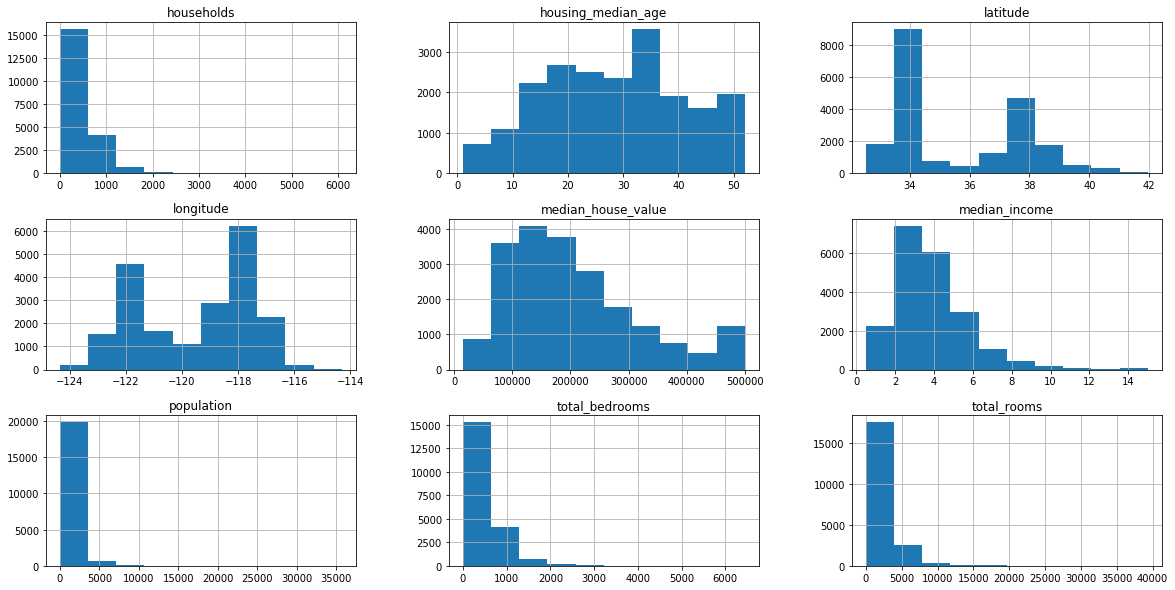

In [4]:
housing_data.hist(figsize =(20,10))
plt.show()
# median_house_value 와 같이 돈에 관한 것들은 대부분 뒤로 갈 수록 완만한 형태를 띄는데
# 이 데이터는 전처리 과정에서 50000이상이 넘어가는 것들은 모두 50000이라고 더해줬기 때문에 저런 형태를 띈다

# spatial data  (시각화)

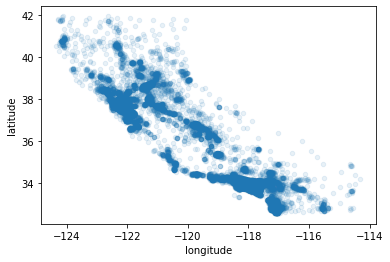

In [5]:
housing_data.plot(kind='scatter',x='longitude',y='latitude', alpha=0.1) # alpah = 점의 투명도
plt.show()

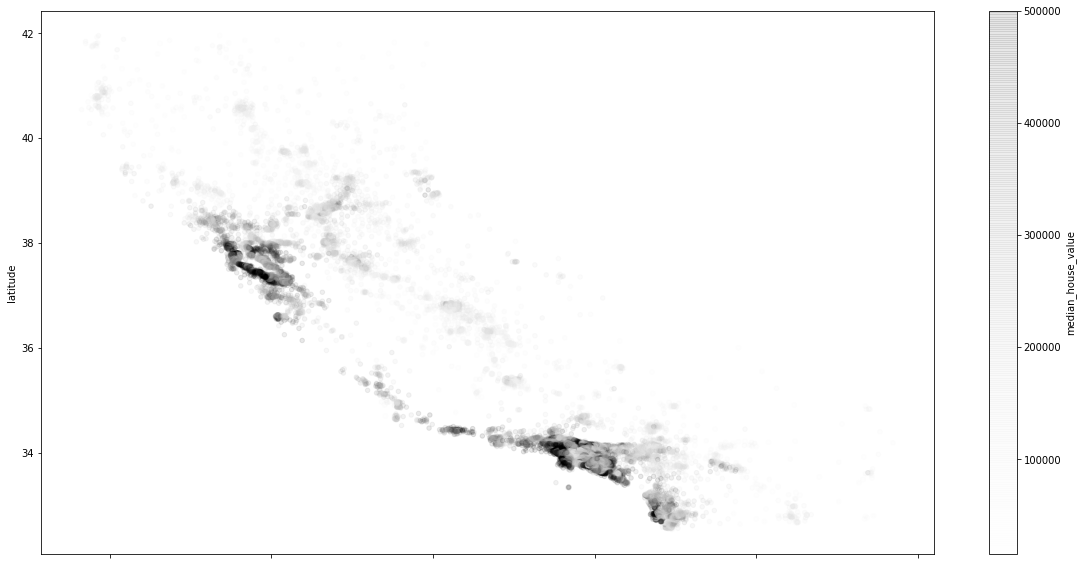

In [6]:
# 사람이 밀집되어 있다보니, 사람의 수와 집값이 영향이 있지 않을까? 
# 집 가격을 기준으로 색깔을 달리 주기
housing_data.plot(kind='scatter',x='longitude',y='latitude',c='median_house_value',alpha=0.1,figsize=(20,10))
plt.show()
# 해안가와 가깝더라도 집값이 비싸지 않은 경우도 있다. 해안가이고 대도시일수록 집값이 비싸다

# 어떤 변수가 유의미한지..

In [7]:
# 왜 대도시 지역의 집 값이 비싼건지 알아봐야 한다. 
# 상관관계 (산점도, 상관관계)

In [8]:
# 상관관계 
corr_matrix = housing_data.corr()

In [9]:
corr_matrix['median_house_value']
# 집 값은 사람들의 소득과의 관련이 있다. 

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [10]:
# 산점도 
# 상관계수라는 것은 두 변수간의 선형관계를 보여주는 것. 
# 상관관계가 낮다고 해서 서로 관련이 없는게 아니다. 서로 관계가 있더라도 2차 곡선이나 3차 곡선으로 관계가 있다면 상관관계가 낮다고 나올 수도 있다.
# 그래서 상관관계뿐만 아니라 산점도 분석도 해줘야 한다. 

In [11]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002098F4C07C8>,
      dtype=object)

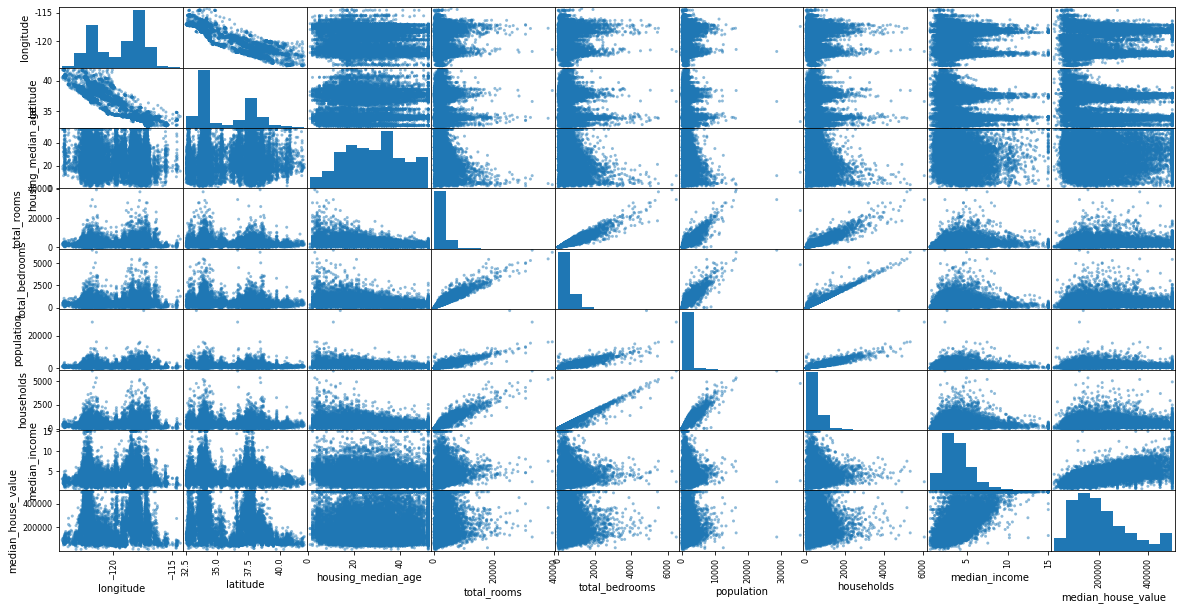

In [12]:
scatter_matrix(housing_data, figsize=(20,10))

In [13]:
# total_rooms, total_bedrooms, population, households (독립변수들) 가 서로 상관관계가 매우 높다
# 이럴 경우, 선형회귀분석 -> 다중공선성 문제 발생 할 수 있음. 
# 독립변수끼리 상관관계가 높으면 추정된 회귀식의 모형이 불안정해질 수 있다. -> 모형자체의 분산 값이 높아진다. -> 트레이닝 셋이 바뀔 때마다 모형이 급격하게 바뀐다. -> 절편값이나 기울기값이 데이터가 조금만 바뀌어도 값이 잘 바뀐다.

- 중간 소득과 집 가격이 상관관계가 높다. 
- 독립변수들이 상관관계가 높다 (다중공선성)
- 변수들이 치우침이 큼. (종속변수=median_house_value)
- 변수들별로 단위가 다름 

In [1]:
# 이러한 insight를 얻기 위해서는 어떤 모델을 쓸 것인지 모델에 대한 이해가 있어야 한다. 